ID: 1, Text: doing so, since he was being fed at what appeared to be regular intervals. He was getting, he judged, three meals in the twenty-four hours; sometimes he wondered dimly whether he was getting them by night or by day. The food was surprisingly good, with meat at every third meal. Once there was even a packet of cigarettes. He had no matches, but the never-speaking guard who brought his food would give him a light. The first time he tried to smoke it made him sick, but he persevered, and spun the packet out for a long time, smoking half a cigarette after each meal. They had given him a white slate with a stump of pencil tied to the corner. At first he made no use of it. Even when he was awake he was completely torpid. Often he would lie from one meal to the next almost without stirring, sometimes asleep, sometimes waking into vague reveries in which it was too much trouble to open his eyes. He had long grown used to...
ID: 2, Text: fire, blinking at the light. "He sent the gi

/home/guangwei/miniconda3/envs/zdh/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/guangwei/miniconda3/envs/zdh/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/guangwei/miniconda3/envs/zdh/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


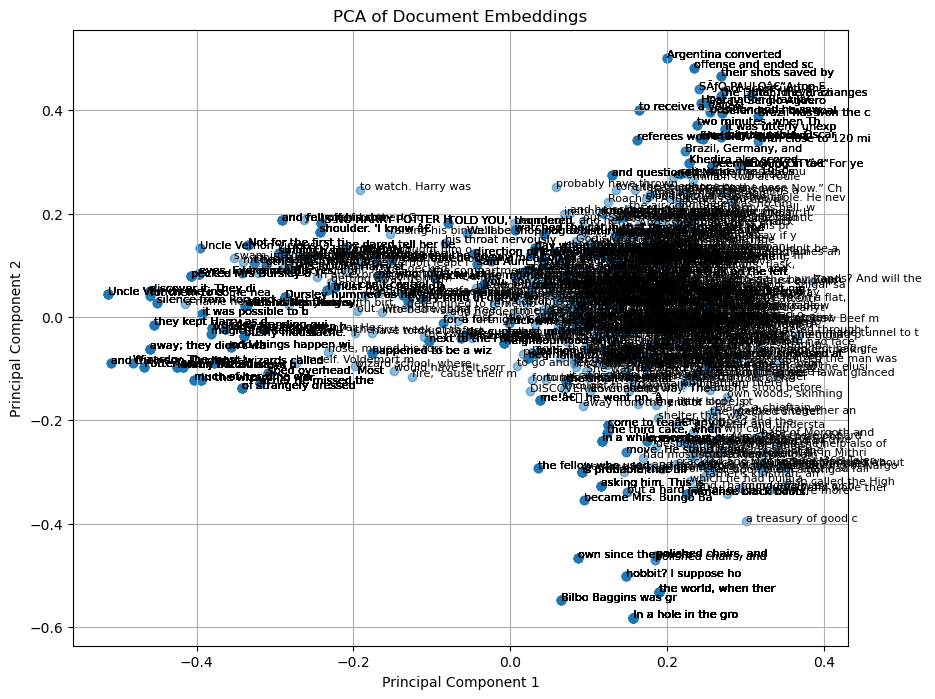

In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
def connect_to_database(db_name):
    conn = sqlite3.connect(db_name)
    return conn

# Fetch documents and embeddings from the database
def fetch_data(conn):
    cursor = conn.cursor()
    cursor.execute("SELECT id, document_text, embedding FROM documents")
    rows = cursor.fetchall()
    
    # Extract IDs, texts, and embeddings
    ids = []
    texts = []
    embeddings = []
    
    for row in rows:
        ids.append(row[0])  # Append the document ID
        texts.append(row[1])  # Append the document text
        # Convert BLOB to NumPy array
        embedding = np.frombuffer(row[2], dtype=np.float32)  # Assuming the embeddings are float32
        embeddings.append(embedding)

    return ids, texts, np.array(embeddings)

# Visualize embeddings using PCA
def plot_embeddings(embeddings, texts):
    # Reduce dimensions to 2D for visualization
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)

    # Annotate each point with the first 20 characters of the document text
    for i, text in enumerate(texts):
        plt.annotate(text[:20], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)

    plt.title("PCA of Document Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

# Main program execution
def main():
    # Database name
    db_name = 'rag_db.sqlite'
    
    # Connect to the database
    conn = connect_to_database(db_name)
    
    # Fetch data from the database
    ids, texts, embeddings = fetch_data(conn)

    # Print document IDs and their corresponding texts
    for i in range(len(ids)):
        print(f"ID: {ids[i]}, Text: {texts[i][:30]}...")  # Print first 30 characters of each document

    # Visualize the embeddings
    plot_embeddings(embeddings, texts)
    
    # Close the database connection
    conn.close()

if __name__ == "__main__":
    main()
